Yuliia Bosher 24.05.2024

# Example dashboard

## Annotation Polar

### This example shows how to create an annotation on a polar graph.

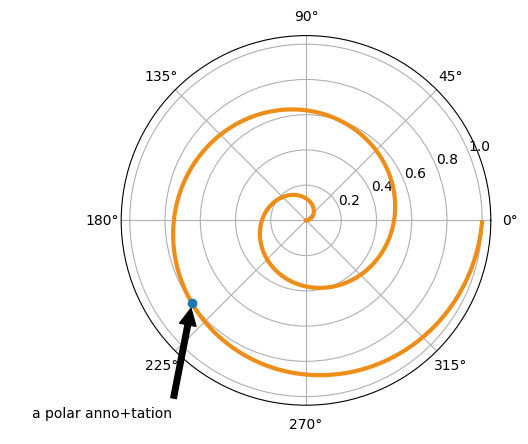

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import voila

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar anno+tation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

## Hillshading

### Demonstrates a few common tricks with shaded plots.

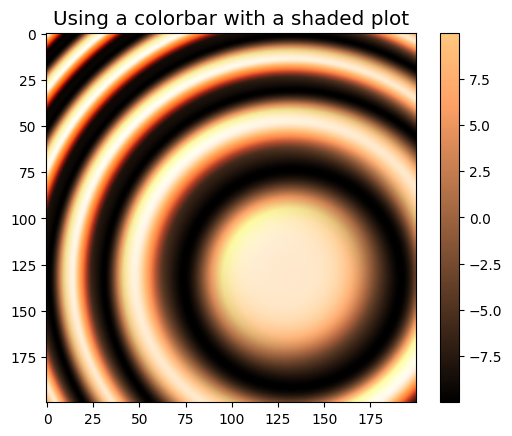

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im, ax=ax)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
plt.show()

## Triplot Demo

### Creating and plotting unstructured triangular grids.

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

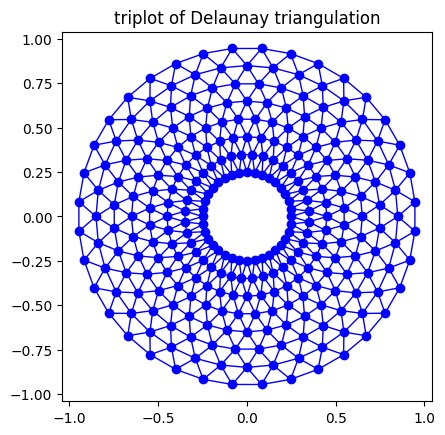

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri
# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')